# Run Inference on Multi-Region S3 Buckets

### Prerequisites
- terraform
- python
- aws cli (configured)

In [3]:
%cd multi-region

/workspaces/examples/multi-region


## Add your regions to regions.md
### Note: The Bootstrap region should be first

In [4]:
%cat regions.md

# aws ec2 describe-regions | jq -r '.Regions[].RegionName'
# Bootstrap region must be first
ca-central-1
eu-north-1
us-east-1
us-west-1


In [7]:
# install dependencies
%pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.9/135.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 62.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
#Replace the value of the name parameter with the name of your AMI
%python3 get_instance_amis.py --name "Deep Learning AMI GPU PyTorch 2.0.1 (Ubuntu 20.04) 20230620"

{
    "ca-central-1": {
        "region": "ca-central-1",
        "zone": "ca-central-1a",
        "instance_ami": "ami-0c483e1cc1d6e27f8"
    },
    "eu-north-1": {
        "region": "eu-north-1",
        "zone": "eu-north-1a",
        "instance_ami": "ami-033855fe5b2db3d01"
    },
    "us-east-1": {
        "region": "us-east-1",
        "zone": "us-east-1a",
        "instance_ami": "ami-0240b7264c1c9e6a9"
    },
    "us-west-1": {
        "region": "us-west-1",
        "zone": "us-west-1a",
        "instance_ami": "ami-0eaef2301ab069ace"
    }
}


## Replace the Values of "locations" with the values outputted from the above command

In [10]:
%cat ./tf/.env.example

{
  "access_key": "AKIAUEMPQ7JFEXAMPLE",
  "secret_key": "a3YhVb06muc4+YSnlzqLzJJ2sOrxl/EXAMPLE",
  "bootstrap_region": "ca-central-1", # Bootstrap region must be firts (also, delete this line in the final, json doesn't support comments)
  "locations": {
    "ca-central-1": {
      "region": "ca-central-1",
      "availability_zone": "ca-central-1a",
      "instance_ami": "ami-0ea18256de20ecdfc"
    },
    "us-west-2": {
      "region": "us-west-2",
      "availability_zone": "us-west-2a",
      "instance_ami": "ami-0fcf52bcf5db7b003"
    },
    "eu-west-1": {
      "region": "eu-west-1",
      "availability_zone": "eu-west-1a",
      "instance_ami": "ami-00aa9d3df94c6c354"
    },
    "eu-north-1": {
      "region": "eu-north-1",
      "availability_zone": "eu-north-1a",
      "instance_ami": "ami-0a79730daaf45078a"
    },
    "ap-southeast-1": {
      "region": "ap-southeast-1",
      "availability_zone": "ap-southeast-1a",
      "instance_ami": "ami-0a72af05d27b49ccb"
    }
  },
  "a

## Replace The values of the keys with your own key values and also the value of instance_type if you want

In [ ]:
%%bash
cp -r .env.example .env.json

### Deploying the infra

In [ ]:
%%bash
./bulk-deploy.sh create

### Populating the Buckets with random samples from the coco-2017 val dataset
Putting 10 sample images in each bucket

In [ ]:
%%bash
python3 populate_buckets.py --sample_size 10

### Running the job

In [ ]:
%%bash
python3 job.py "person"

### Downloading the outputs

In [ ]:
%%bash
python3 download_outputs.py

### Viewing the outputs

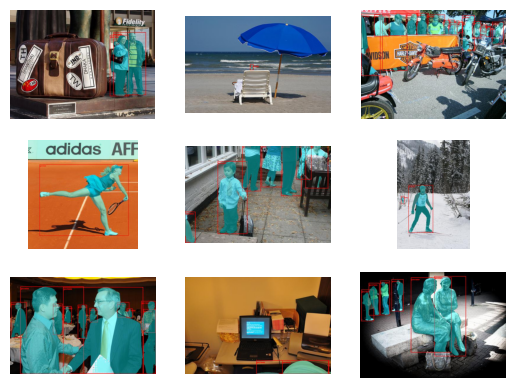

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the folder where the images are stored
image_folder = os.path.join(os.getcwd(), 'outputs')

# List to store the images
images = []

# Go through all the files in the folder
for filename in os.listdir(image_folder):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Open the image and append it to the list
        images.append(Image.open(os.path.join(image_folder, filename)))

# Number of images
num_images = len(images)

# Define the size of the grid
grid_size = int(num_images**0.5)

# Create subplots
fig, axs = plt.subplots(grid_size, grid_size)

# Go through all the images and plot them
for i, img in enumerate(images):
    axs[i//grid_size, i%grid_size].imshow(img)
    axs[i//grid_size, i%grid_size].axis('off')

# Show the plot
plt.show()